In [1]:
import math
import numpy as np
import pandas as pd


from sklearn import linear_model, model_selection, metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('../data/6_train_dataset_augmented.csv')
train.head()


,is_fraud,ERC20_num_unique_senders_to_acc,total_transactions,ERC20_num_unique_senders_contract_to_acc,total_value_sent_ratio,avg_value_sent,num_received_to_total_txns_ratio,min_value_sent,ERC20_num_unique_recipients_from_acc,num_unique_senders_to_acc,...,num_unique_recipients_from_acc,first_and_last_txns_time_diff,total_value_received_ratio,has_sent_ERC20,max_value_sent,avg_time_between_received_txns,min_value_received,avg_time_between_sent_txns,total_ERC20_sent_contract_in_ether,ERC20_max_value_sent
0,0,0.0,111,0.0,0.500672,0.156104,0.504505,0.015341,0.0,3,...,2,450875.98,0.499328,0,1.001666,8048.14,0.015761,3.28,0.0,0.0
1,0,0.0,260,0.0,0.500388,0.270446,0.500000,0.025580,0.0,2,...,2,136967.03,0.499612,0,0.791452,957.18,0.026000,96.42,0.0,0.0
2,0,0.0,6,0.0,0.500005,25.249470,0.333333,0.004454,0.0,2,...,2,331.23,0.499995,0,100.414520,0.02,26.376409,82.80,0.0,0.0
3,1,0.0,7,0.0,0.000000,0.000000,0.857143,0.000000,0.0,3,...,0,176158.57,0.000000,0,0.000000,29359.76,0.000000,0.00,0.0,0.0
4,1,0.0,6,0.0,0.000000,0.000000,0.833333,0.000000,0.0,3,...,0,173765.32,0.000000,0,0.000000,34753.06,0.000000,0.00,0.0,0.0


In [3]:
test = pd.read_csv('../data/4_test_dataset.csv')
test.head()

,is_fraud,ERC20_num_unique_senders_to_acc,total_transactions,ERC20_num_unique_senders_contract_to_acc,total_value_sent_ratio,avg_value_sent,num_received_to_total_txns_ratio,min_value_sent,ERC20_num_unique_recipients_from_acc,num_unique_senders_to_acc,...,num_unique_recipients_from_acc,first_and_last_txns_time_diff,total_value_received_ratio,has_sent_ERC20,max_value_sent,avg_time_between_received_txns,min_value_received,avg_time_between_sent_txns,total_ERC20_sent_contract_in_ether,ERC20_max_value_sent
0,1,0.0,2,0.0,0.503905,0.098450,0.500000,0.098450,0.0,1,...,1,1648.68,0.496095,0,0.098450,0.00,0.100000,0.00,0.0,0.00000
1,0,2.0,146,2.0,1.000000,0.000000,0.993151,0.000000,0.0,3,...,0,229000.73,0.000000,0,0.000000,1579.32,0.000000,0.00,0.0,0.00000
2,0,0.0,24,0.0,0.501887,0.076196,0.500000,0.048476,0.0,2,...,12,99075.63,0.498113,0,0.156897,8170.50,0.049115,85.81,0.0,0.00000
3,0,29.0,109,43.0,0.494445,3.148239,0.321101,0.000000,2.0,5,...,41,728358.93,0.505555,1,20.200000,2453.79,0.152000,8682.11,0.0,20173.81535
4,0,5.0,1,5.0,1.000000,0.000000,1.000000,0.000000,0.0,1,...,0,0.00,0.000000,0,0.000000,0.00,0.681968,0.00,0.0,0.00000


In [4]:
X_train = train.drop(['is_fraud'],axis=1)
y_train = train['is_fraud']

X_test = test.drop(['is_fraud'],axis=1)
y_test = test['is_fraud']


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(59164, 21) (59164,)
(3927, 21) (3927,)


In [53]:
lr = linear_model.LogisticRegression(C=500) #, fit_intercept = False)
lr.fit(X_train,y_train)

LogisticRegression(C=500)

In [54]:
#train data score
lr.score(X_train, y_train)

0.6120782908525455

In [7]:
lr.score(X_test, y_test)

0.7993379169849758

In [55]:
# Perform prediction on the test set using trained logistic regression model
y_pred = lr.predict(X_test)
print('accuracy:', metrics.accuracy_score(y_test, y_pred))

accuracy: 0.8296409472880061


In [9]:
#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [56]:
#lr = linear_model.LogisticRegression(fit_intercept=False, C=500)
lr.fit(X_train_scaled,y_train)

LogisticRegression(C=500)

In [57]:
#train data score
lr.score(X_train_scaled, y_train)

0.7013555540531404

In [58]:
# Perform prediction on the test set using trained logistic regression model
y_pred = lr.predict(X_test_scaled)
print('accuracy:', metrics.accuracy_score(y_test, y_pred))

accuracy: 0.8026483320600968


In [40]:
#Hyperparameter tuning
param_grid = [    
    {'penalty' : ['none', 'l2','l1'],
    'C' : np.logspace(-3, 3, 7),
    'solver' : ['lbfgs','saga','liblinear'],
    #'max_iter' : [1000,2500, 5000]
    }
]

In [41]:
logModel = linear_model.LogisticRegression( max_iter=5000)

In [42]:
clf = model_selection.GridSearchCV(logModel, param_grid= param_grid, cv=3, scoring='accuracy') #,n_jobs=1)


In [43]:
best_clf = clf.fit(X_train_scaled,y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.frame

In [44]:
best_clf.best_estimator_

LogisticRegression(C=1000.0, max_iter=5000)

In [45]:
best_clf.best_score_

0.6989383632738461

In [46]:
# Perform prediction on the test set using trained logistic regression model
y_pred = best_clf.predict(X_test_scaled)
print('accuracy:', metrics.accuracy_score(y_test, y_pred))

accuracy: 0.8026483320600968


In [47]:
 print(metrics.classification_report(y_test, y_pred, ))
#

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      3055
           1       0.54      0.80      0.64       872

    accuracy                           0.80      3927
   macro avg       0.74      0.80      0.75      3927
weighted avg       0.85      0.80      0.81      3927



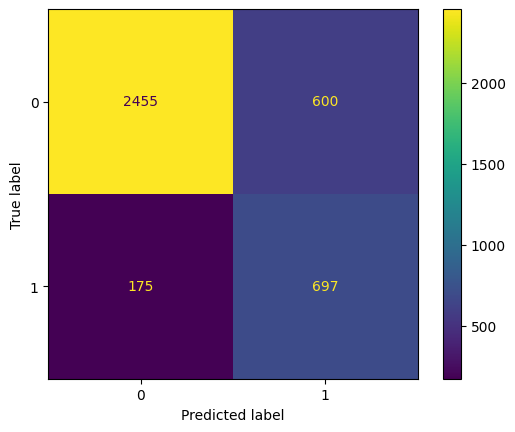

In [69]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

plt.show()

In [48]:
#youden index
y_pred2=best_clf.predict_proba(X_test_scaled)
y_pred2

array([[0.60612642, 0.39387358],
       [0.42655293, 0.57344707],
       [0.6830106 , 0.3169894 ],
       ...,
       [0.60666251, 0.39333749],
       [0.98298043, 0.01701957],
       [0.63575254, 0.36424746]])

In [49]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred2[:,1])
j_scores = tpr - fpr

optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.5978777712118799


In [50]:
threshold = optimal_threshold
preds = np.where(y_pred2[:,1] > threshold, 1, 0)
print(metrics.classification_report(y_test  , preds))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3055
           1       0.80      0.77      0.79       872

    accuracy                           0.91      3927
   macro avg       0.87      0.86      0.86      3927
weighted avg       0.91      0.91      0.91      3927



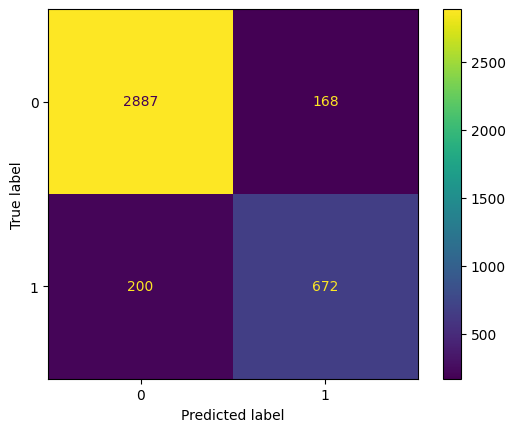

In [70]:
cm = metrics.confusion_matrix(y_test, preds, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

plt.show()

In [52]:
print(best_clf.best_params_)

{'C': 1000.0, 'penalty': 'l2', 'solver': 'lbfgs'}


In [59]:
best_model = best_clf.best_estimator_
coefficients = best_model.coef_

# Print the coefficients
print("Coefficients:", coefficients)

Coefficients: [[-2.01290399e-01 -4.44941315e-01  1.53241905e-01 -2.77266756e-01
  -6.42159158e-02  7.93461091e-02  1.46944234e-01  1.34120619e-01
   5.94012147e-02 -1.27595587e-01  2.70932020e-02 -1.88894526e-01
  -5.03726176e-01 -6.83149991e-01  6.30340201e-01 -2.31817803e-01
  -3.31450270e-01 -4.33785433e-02 -8.06703332e-02 -9.39859674e-03
   1.16018809e+01]]


In [63]:
feature_names = X_train.columns.tolist()
# Create a DataFrame to display coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': best_model.coef_[0]})
print(coefficients_df)

                                     Feature  Coefficient
0            ERC20_num_unique_senders_to_acc    -0.201290
1                         total_transactions    -0.444941
2   ERC20_num_unique_senders_contract_to_acc     0.153242
3                     total_value_sent_ratio    -0.277267
4                             avg_value_sent    -0.064216
5           num_received_to_total_txns_ratio     0.079346
6                             min_value_sent     0.146944
7       ERC20_num_unique_recipients_from_acc     0.134121
8                  num_unique_senders_to_acc     0.059401
9                         max_value_received    -0.127596
10                      total_ether_received     0.027093
11            num_unique_recipients_from_acc    -0.188895
12             first_and_last_txns_time_diff    -0.503726
13                total_value_received_ratio    -0.683150
14                            has_sent_ERC20     0.630340
15                            max_value_sent    -0.231818
16            